<a href="https://colab.research.google.com/github/sammix95/Sammix/blob/master/Salary_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme('talk')
sns.set_style('darkgrid')

# Salary Analysis Project

#### *The data of employees were collected and sent to the Data Science team to know the Total Pay Benefits entitled to an employee in any given year.*

In [ ]:
# let's load the data.
salary = pd.read_csv('Salaries.csv')

In [ ]:
salary.head() # view the first five rows of the dataset

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
salary.tail() # check the last five rows of the dataset

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


### Data Cleaning

<AxesSubplot:>

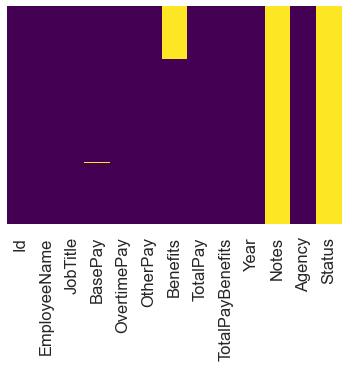

In [ ]:
sns.heatmap(salary.isnull(), yticklabels=False, cbar=False, cmap='viridis') # check for missing data using seaborn heatmap

In [ ]:
salary.drop(['Notes', 'Status'], axis=1, inplace=True) # Note and Status column has much missing data, so we have to drop it.

In [ ]:
salary.dropna(axis = 0, how = 'any', inplace = True) # Other columns have few missing data too, so let's clean the dataset.

In [ ]:
salary.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148645,148646,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco


<AxesSubplot:>

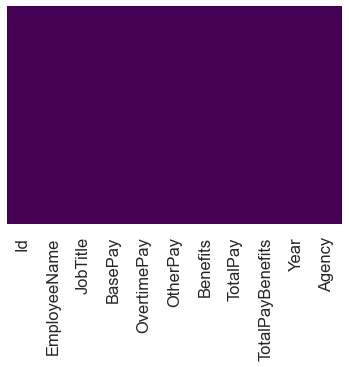

In [ ]:
sns.heatmap(salary.isnull(), yticklabels=False, cbar=False, cmap='viridis') #confirm that no more missing data

### Exploratory Data Analysis

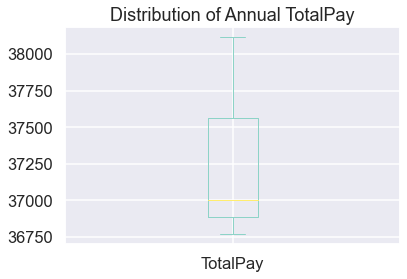

In [ ]:
# create a function that takes in quantitative columns and returns a boxplot distribution based on the year.
def plot_bar(x):
    salary.groupby(['Year'])[[x]].count().plot(kind='box', title='Distribution of Annual {}'.format(x), cmap = 'Set3')
    plt.show()
    return

plot_bar('TotalPay')

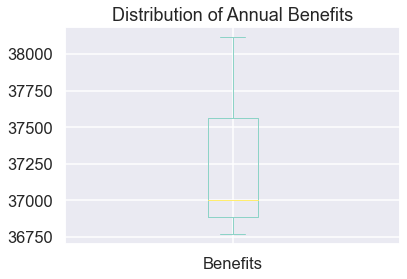

In [ ]:
plot_bar('Benefits')

In [ ]:
salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,San Francisco
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,San Francisco
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,San Francisco
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco


In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111886 entries, 36159 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                111886 non-null  int64  
 1   EmployeeName      111886 non-null  object 
 2   JobTitle          111886 non-null  object 
 3   BasePay           111886 non-null  float64
 4   OvertimePay       111886 non-null  float64
 5   OtherPay          111886 non-null  float64
 6   Benefits          111886 non-null  float64
 7   TotalPay          111886 non-null  float64
 8   TotalPayBenefits  111886 non-null  float64
 9   Year              111886 non-null  int64  
 10  Agency            111886 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 10.2+ MB


In [ ]:
salary.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,111886.00000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000
mean,92327.01674,67207.558425,5266.322389,3654.897644,25114.344510,76128.778458,101243.122968,2013.012093
std,32543.14780,43417.689463,11764.540181,8038.682219,15372.790545,51269.681584,65248.814471,0.818020
min,36160.00000,-166.010000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,2012.000000
25%,64131.25000,33644.427500,0.000000,0.000000,12143.155000,37041.205000,49674.847500,2012.000000
50%,92109.50000,65547.035000,0.000000,820.630000,28697.845000,72628.810000,101967.740000,2013.000000
75%,120678.75000,95229.030000,4865.052500,4307.017500,35608.617500,107530.010000,142991.082500,2014.000000
max,148654.00000,319275.010000,220909.480000,342802.630000,96570.660000,471952.640000,510732.680000,2014.000000


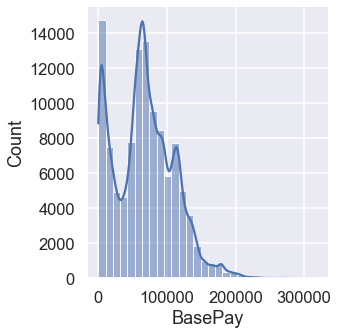

In [ ]:
sns.displot(x='BasePay', data=salary, bins=30, kde=True, palette ='coolwarm')

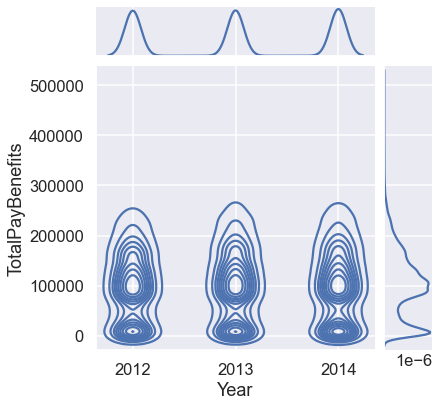

In [ ]:
sns.jointplot(x='Year', y='TotalPayBenefits', data=salary, kind='kde', palette='coolwarm')

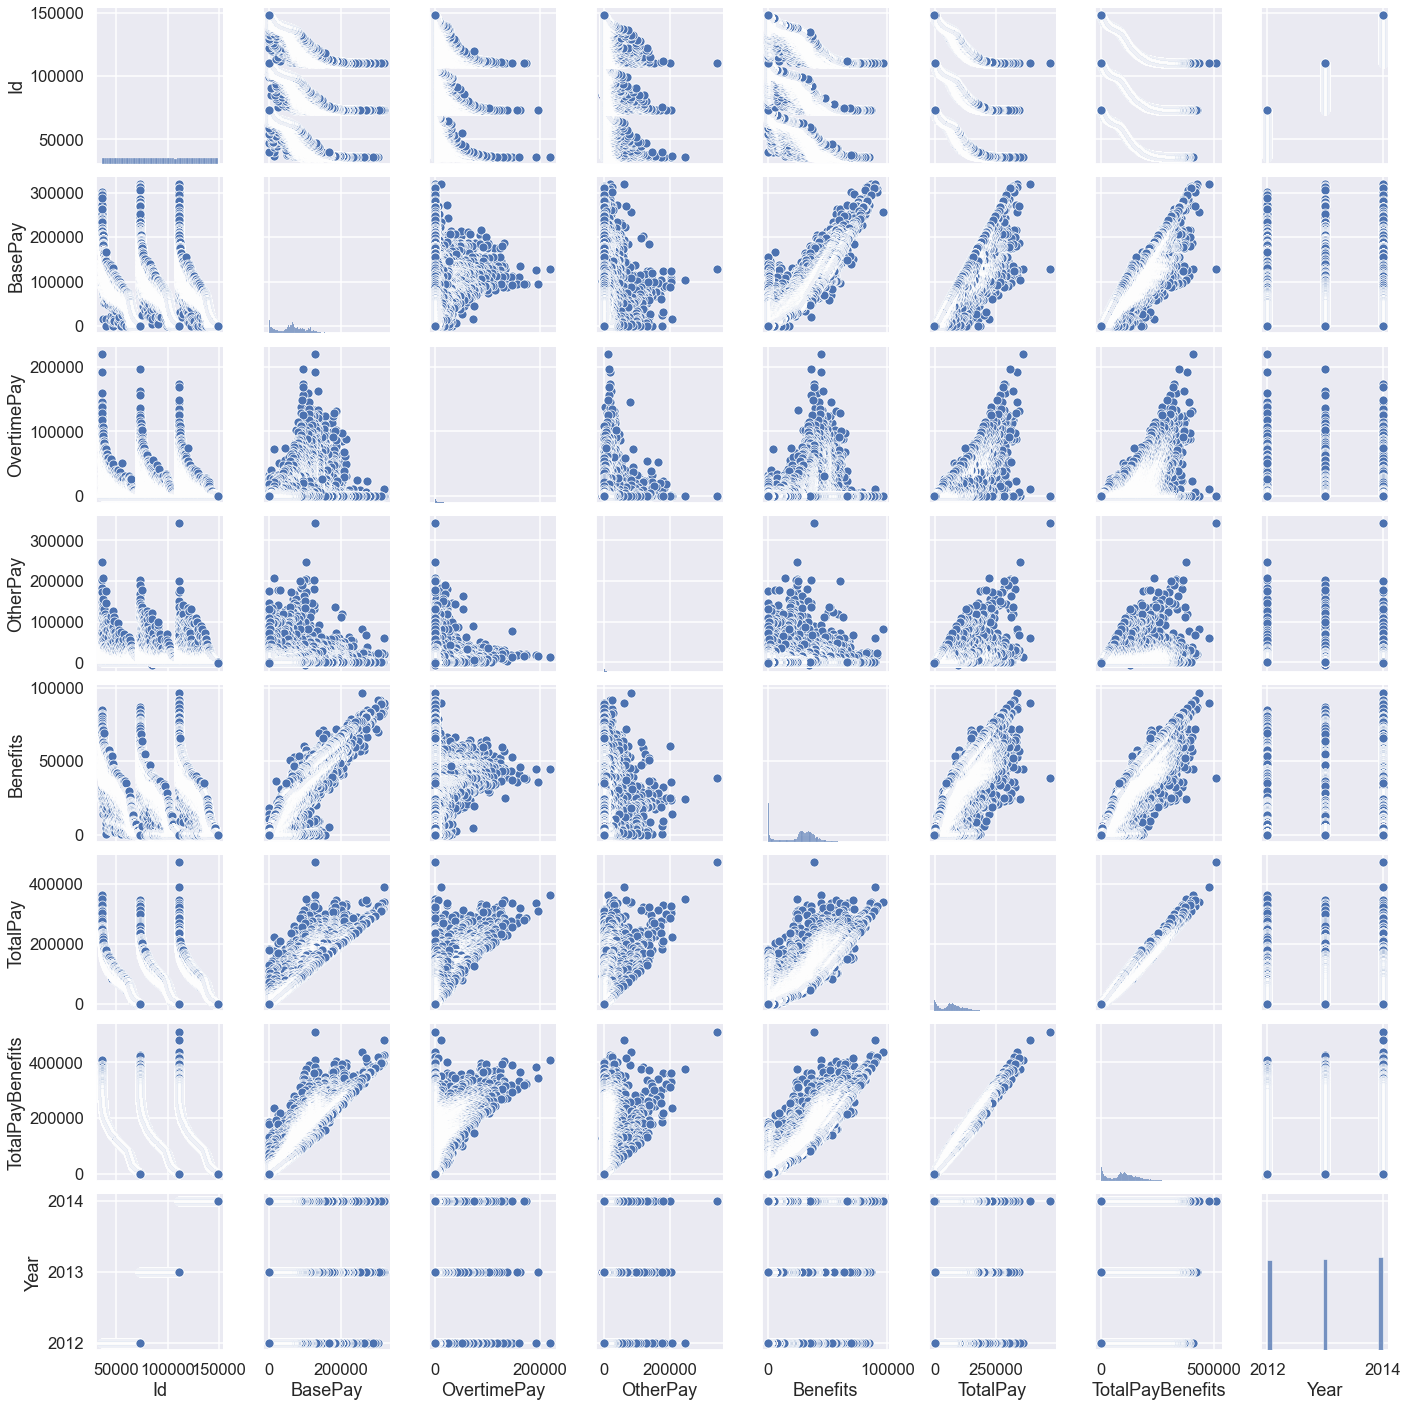

In [ ]:
sns.pairplot(data=salary, palette='coolwarm')

In [ ]:
salary.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

## Now, let's begin our predictions

In [ ]:
# Select your variables X and y
X = salary.drop(['TotalPayBenefits','EmployeeName','JobTitle','Agency'], axis=1)
y = salary['TotalPayBenefits']

In [ ]:
from sklearn.model_selection import train_test_split # import the train_test_split model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # split your data

In [ ]:
from sklearn.linear_model import LinearRegression # import the linear regression model

In [ ]:
lm = LinearRegression() # initialize your model

In [ ]:
lm.fit(X_train,y_train) # fit your data into your model and train.

LinearRegression()

In [ ]:
predictions = lm.predict(X_test) # make your predictions

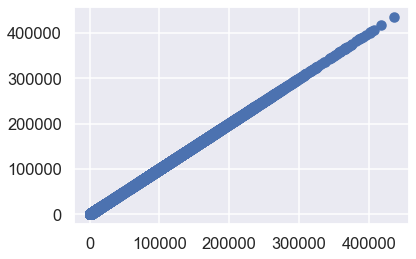

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [ ]:
plt.scatter(y_test,predictions)
plt.show()
plt.tight_layout

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

metrics.explained_variance_score(y_test,predictions)

MAE:  3.5250874460768716e-11
MSE:  2.022189600478338e-21
RMSE:  4.4968762496630235e-11


1.0